<center><strong>Sistem Temu Kembali Informasi</strong><br />
<strong><font color="blue">Semester Gasal T.A. 2020/2021</font></strong><br />
</center>

<strong>Outline pertemuan minggu ke-6</strong><br />
<li> Pendahuluan clustering </li>
<li> K-Means, K-Means++, DBSCAN</li>
<li> Evaluasi clustering</li>
<li> Visualisasi</li>

<p><img alt="" src="figures/56_Supervised VS unsupervised.png" style="height:500px; width:1153px" /></p>

<p><img alt="" src="figures/5_types_of_clustering.png" style="height:500px; width:719px" /></p>

<h3>k-Means</h3>

<p><img alt="" src="figures/5_Kmeans_animation.gif" style="height:300px; width:300px" /></p>

<p><img alt="" src="figures/5_kmeans_Algorithm.png" style="height:229px; width:430px" /></p>

<strong>Kelebihan:</strong>
- Simpel, mudah untuk diimplementasikan
- fleksibel terhadap perubahan jumalah K
- Cocok untuk dataset yang besar
- Mudah diinterpretasikan

<strong>Kekurangan:</strong>
- Harus menentukan jumlah K yang optimal
- Hasil tidak konsisten karena inisialisasi centroid awal adalah random
- Tidak cocok untuk imbalance data
- Hanya untuk data numeric

<h3>k-Means++</h3>

- k-Means memiliki permasalahan pada inisialisasi centroid yang dilakukan secara random
- Hal tersebut menyebabkan k-Means sensitif terhadap inisialisasi
- Untuk mengatasi hal tersebut dapat digunakan k-Means++
- k-Means++ melakukan inisialisasi centroid dengan menghitung probabilitas candidate centroid
- Menghasilkan hasil yang lebih robust dibandingkan k-Means

<strong>Algoritma inisialisasi k-Means++:</strong>
- Memilih satu centroid awal secara random (c1)
- Menghitung jarak antara centroid awal dengan seluruh data point 
- Memilih data point yang memiliki jarak paling jauh dengan (c1) sebagai centroid kedua (c2)
- Dilakukan secara berulang-ulang hingga memperoleh jumlah centroid sesuai dengan jumlah k yang diinginkan

<h3>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</h3>
<p><img alt="" src="figures/5_DBSCAN.gif" style="height:360px; width:690px" /></p>

<p>DBSCAN tidak membutuhkan inisialisasi jumlah cluster. Jumlah cluster secara otomatis akan dideteksi berdasarakn data input</p>

<strong>Istilah pada DBSCAN:</strong>
- **Eps**: radius maksimal dari ketetanggaan
- **MinPts**: jumlah minimum data point dalam Eps-neighbourhood dari sebuah point
- **Reachability**: sebuah point reachabe terhadap data point lain jika memiliki jarak kurang dari Eps
- **Connectivity**: melakukan penentuan apakah sebuah data point termasuk ke dalam suatu cluster dengan transitivity chaining-approach; contoh: p dan q dapat dianggap memiliki koneksi dan berada pada satu cluster apabila p->r->s->t->q
- **Core point**: sebuah data point yang memiliki jumlah Eps-neighbourhood lebih dari MinPts
- **Border point**: sebuah data point yang memiliki jumlah Eps-neighbourhoos kurang dari MinPts
- **Noise**: jika suatu point bukan termasuk ke dalam core maupun border

<p><img alt="" src="figures/dbscan.png" style="height:360px; width:690px" /></p>

<strong>Algoritma DBSCAN:</strong>
- Pilih poin p sebagai inisialisasi poin
- Pilih neighbour point berdasarkan Eps dan MinPts
- Jika p adalah core point maka terbentuklan cluster 1
- Proses diulangi untuk point yang tidak termasuk ke dalam cluster

<strong>Kelebihan:</strong>
- Tidak membutuhkan inisialisasi jumlah cluster
- Robust terhadap outlier 

<strong>Kekurangan:</strong>
- Pada beberapa kasus penentuan Eps tidak mudah 

In [26]:
# Menggunakan data dari 20newsgroups
# Load data dari pickle

import pickle
import os

src_name = "20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

print('DONE!')

DONE!


In [27]:
# preprocessing
import re
from nltk import sent_tokenize
from nltk import word_tokenize

def preprocess(doc):
    sents = sent_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) # menghapus repetitive space
        
        sents_tok.append(s)
    
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

In [28]:
print(len(docs_clear))

1653


In [29]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)

(1653, 10721)


In [30]:
# k-means: 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn import cluster

k = 3
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)
'Done'

'Done'

In [31]:
# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [32]:
# k-means++ clustering 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [33]:
# DBSCAN 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(np.int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h3 id="Latihan:"><font color="blue">Latihan 1:</font></h3>

<ul> 
    <li> Mengapa membutuhkan label data? apa perbedaannya dengan label data pada proses klasifikasi?</li>
    <li> Mengapa hasil dari DBSCAN -1? apa maksudnya? </li>
</ul>

In [ ]:
# Kerjakan latihan 1 pada cell berikut ini


<h3> Evaluasi Clustering </h3>

<strong> Evaluasi clustering dapat dibagi menjadi 2 kelompok: Eksternal dan Internal </strong>

**Eksternal:** menghitung seberapa baik sebuah cluster dibandingkan dengan nground truth

**Internal:** menghitung seberapa baik cluster yang terbentuk berdasarkan intra-cluster similarity dan inter-cluster similarity


<p><img alt="" src="figures/5_Clustering_evaluation.jpg" style="height:400px; width:533px" /></p>


In [34]:
# Evaluasi internal
# Silhouette coefficient
# Menghitung kemiripan data point dengan cluster tempat data point tsb berada
# dibandingkan dengan cluster tetangga
# Range nilai [-1, +1]
# Semakin tinggi nilainya menunjukkan semakin baik cluster yang terbentuk

from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X,res), end=', ')

# NOTE: Silhouette coefficient hanya cocok untuk k-means

0.016165385391274958, 0.015689973083281007, -0.2161719483466259, 

In [35]:
# Evaluasi eksternal
# Purity
# Menghitung jumlah data point yang benar dalam suatu cluster
# Membutuhkan label data dari ground truth
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.05446064048703715, 0.05586319227488934, 0.0016747691594707485, 

In [36]:
# Evaluasi eksternal NMI
# https://taufiksutanto.blogspot.co.id/2017/11/evaluasi-eksternal-clustering-pairwise.html
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label,res), end=', ')

0.062407462771957266, 0.064284734901065, 0.0043502387701237185, 

C:\Users\Rizka\Anaconda3\envs\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


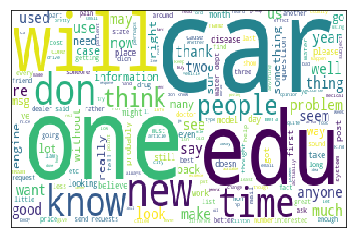

In [37]:
# Visulisasi cluster diperlukan untuk mengetahui gambaran umum dari suatu cluster
# Visualisasi dapat menggunakan word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordClouds(teksCluster):
    wc = WordCloud(background_color="white")#, max_font_size=40
    wordcloud = wc.generate(teksCluster)
    plt.figure(num=1, facecolor='w', edgecolor='k') #figsize=(4, 3), dpi=600, #wc.to_file('wordCloud.png')
    plt.imshow(wordcloud, cmap=plt.cm.jet, interpolation='nearest', aspect='auto'); plt.xticks(()); plt.yticks(())
    #plt.savefig('wordCloud.png',bbox_inches='tight', pad_inches = 0.1, dpi=300)
    plt.show()
    
cluster = 1 # misal cluster pertama
idx = [i for i,c in enumerate(C_kmpp) if c==cluster]
teks_cluster = ' '.join([docs_clear[i] for i in idx])
wordClouds(teks_cluster)
    

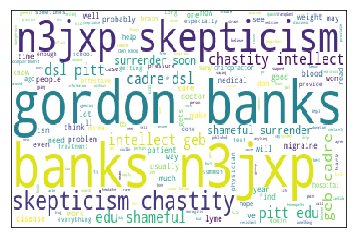

In [38]:
cluster = 2 # misal cluster pertama
idx = [i for i,c in enumerate(C_kmpp) if c==cluster]
teks_cluster = ' '.join([docs_clear[i] for i in idx])
wordClouds(teks_cluster)

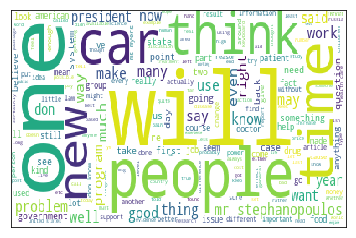

In [39]:
cluster = 0 # misal cluster pertama
idx = [i for i,c in enumerate(C_kmpp) if c==cluster]
teks_cluster = ' '.join([docs_clear[i] for i in idx])
wordClouds(teks_cluster)

<h3 id="Latihan:"><font color="blue">Latihan 2:</font></h3>

<ol>
	<li>load <strong>3</strong> kategori lain dari data 20newsgroup</li>
	<li>&nbsp;Lakukan preprocessing</li>
	<li>&nbsp;Bentuk vsmnya</li>
	<li>lakukan k-means++ clustering, misal k=3</li>
	<li>Evaluasi secara internal</li>
	<li>visualisasi hasilnya</li>
</ol>


In [ ]:
# Kerjakan latihan 2 pada cell berikut ini